In [25]:
import numpy as np
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt


In [66]:
data = pd.read_csv('./ex1data1.txt',header= None , names=('population','profit'))
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


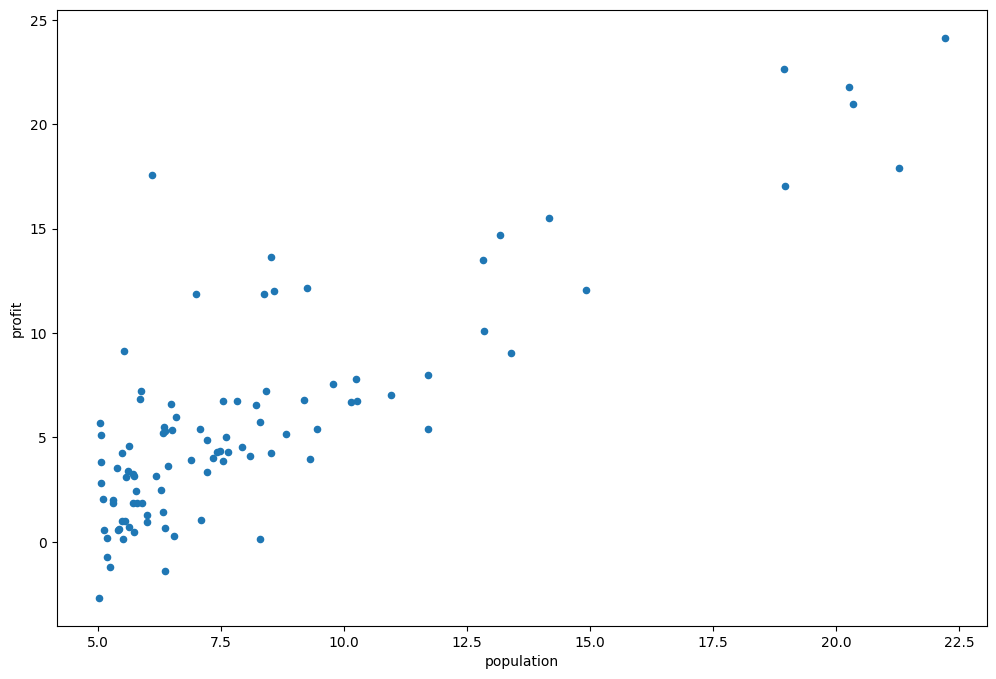

In [4]:
data.plot(kind = 'scatter',x = 'population',y = 'profit',figsize = (12,8))
plt.show()

In [46]:
"""计算损失"""
def ComputeCost(X,y,theta):
    temp = np.power(((X * theta.T) - y) , 2)
    return np.sum(temp) / (2 * (len(X)))


In [38]:
data.insert(0,'ones',1)
data.head()

AttributeError: 'numpy.ndarray' object has no attribute 'insert'

In [39]:
X = data[:,:data.shape[1] - 1]
y = data[:,data.shape[1] - 1 : ]
theta = np.zeros((1,2))
theta


array([[0., 0.]])

In [40]:
X = np.matrix(X)
y = np.matrix(y)
theta = np.matrix(theta)

In [41]:
X.shape,y.shape,theta.shape

((97, 2), (97, 1), (1, 2))

In [51]:
ComputeCost(X,y,theta)

32.072733877455676

In [58]:
theta.shape[1]
error = X * theta.T - y
term = np.multiply(error,X[:,0])
term
m = [5,5]
n = [1,2]
np.multiply(m,n)


array([ 5, 10])

In [62]:
alpha = 0.01
epoches = 1000

cost = np.zeros(epoches)
def gradient(alpha,epoches,X,y,theta):
    for epoch in range(epoches):
        temp = np.matrix(np.zeros(theta.shape))
        parameters = theta.shape[1]

        error = X * theta.T - y
        for i in range(parameters):
            term = np.multiply(error,X[:,i])
            temp[0,i] = theta[0,i] - (alpha / len(X)) * np.sum(term)
        theta = temp
        cost[epoch] = ComputeCost(X,y,theta)
        print('epoch:{}, cost = {}'.format(epoch,cost[epoch]))





4.515815084502823
epoch:0, cost = 4.5156751717063415
epoch:1, cost = 4.515535762867679
epoch:2, cost = 4.515396856171607
epoch:3, cost = 4.51525844980944
epoch:4, cost = 4.515120541978999
epoch:5, cost = 4.514983130884608
epoch:6, cost = 4.514846214737048
epoch:7, cost = 4.51470979175355
epoch:8, cost = 4.514573860157766
epoch:9, cost = 4.514438418179744
epoch:10, cost = 4.514303464055912
epoch:11, cost = 4.5141689960290465
epoch:12, cost = 4.514035012348253
epoch:13, cost = 4.513901511268946
epoch:14, cost = 4.513768491052821
epoch:15, cost = 4.51363594996784
epoch:16, cost = 4.5135038862881975
epoch:17, cost = 4.513372298294308
epoch:18, cost = 4.513241184272777
epoch:19, cost = 4.5131105425163875
epoch:20, cost = 4.512980371324064
epoch:21, cost = 4.512850669000864
epoch:22, cost = 4.512721433857947
epoch:23, cost = 4.512592664212556
epoch:24, cost = 4.512464358387996
epoch:25, cost = 4.512336514713613
epoch:26, cost = 4.5122091315247665
epoch:27, cost = 4.512082207162816
epoch:28, 

In [63]:
theta

matrix([[-3.78826273,  1.18223228]])

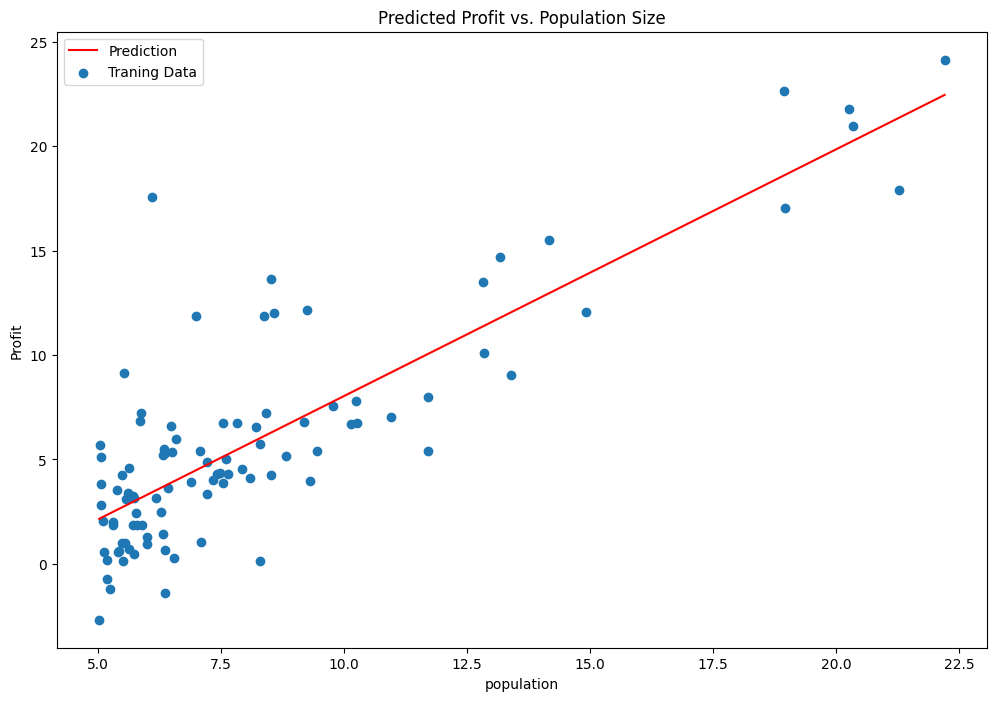

In [68]:
x = np.linspace(data.population.min(), data.population.max(), 100)
f = theta[0, 0] + (theta[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.population, data.profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

多分类问题

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import  pandas as pd
from sklearn.preprocessing import  normalize

In [71]:
data = pd.read_csv('./ex1data2.txt',names=['Size', 'Bedrooms', 'Price'],header= None)
data.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [75]:
# 预处理 归一化
data = (data - data.mean())/data.std()
data.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [76]:
data.insert(0,'ones',1)
data.head()

,ones,Size,Bedrooms,Price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [85]:
X = data.iloc[:,:data.shape[1]-1]
y = data.iloc[:,data.shape[1]-1]
y.head()

0    0.475747
1   -0.084074
2    0.228626
3   -0.867025
4    1.595389
Name: Price, dtype: float64

In [87]:
theta = np.zeros((1,data.shape[1]))
theta

array([[0., 0., 0., 0.]])

In [89]:
from sklearn import  linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X,y)
linear_regression.score(X,y)

0.7329450180289143

C:\Users\25083\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.60999552])